# Example usage

To use `synapsesignature` in a project:

In [1]:
import synapsesignature
import json
from importlib import resources
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(synapsesignature.__version__)


0.1.0


## Load plasma signature weights

In [2]:
weightsdf = pd.read_csv(resources.open_text("synapsesignature.data", "Ohetal_ST11.csv"))
weightsdf


,Symbol_unique,SeqId,coef,abs coef,intercept,mean,std_dev,assay,5k_to_7k_scale,11k_to_7k_scale
0,PDGFRA,10366-11,0.008028,0.008028,0.817268,3.083279,0.174205,5k,0.767,NaN
1,SCARA5,10419-1,0.012099,0.012099,0.817268,3.724732,0.146852,5k,0.787,NaN
2,KIR2DS2,10428-1,0.003254,0.003254,0.817268,3.176708,0.231993,5k,0.654,NaN
3,RPN1.1,10490-3,-0.003532,0.003532,0.817268,3.505364,0.136095,5k,0.862,NaN
4,PTGDS,10514-5,0.062116,0.062116,0.817268,4.335063,0.139969,5k,0.719,NaN
...,...,...,...,...,...,...,...,...,...,...
526,TIGIT.2,9638-2,-0.000895,0.000895,0.818120,1.947232,0.188881,7k,NaN,0.987
527,TAGLN.2,9756-6,0.005184,0.005184,0.818120,3.422987,0.155943,7k,NaN,1.142
528,SEMA4B,9805-51,-0.015607,0.015607,0.818120,3.033883,0.125209,7k,NaN,1.087
529,KRT1,9931-20,0.020107,0.020107,0.818120,3.175315,0.128921,7k,NaN,0.895


## Load raw proteomics data

In [3]:
#example proteomics dataframe with SeqId as column names
dfprot = pd.read_csv(resources.open_text("synapsesignature.data", "dfprot_example.csv")).set_index("ID")
dfprot


,10000-28,10001-7,10003-15,10006-25,10008-43,10010-10,10011-65,10012-5,10014-31,10015-119,...,9984-12,9986-14,9987-30,9989-12,9991-112,9993-11,9994-217,9995-6,9997-12,9999-1
ID,,,,,,,,,,,,,,,,,,,,,
0,864.7,301.5,129.0,826.6,1445.3,376.2,2353.4,1478.8,714.4,612.9,...,675.0,1171.7,512.0,521.8,232.6,1316.8,2178.9,1516.7,6781.8,1087.7
1,465.8,307.1,137.2,507.1,375.0,289.3,2831.6,1269.8,763.5,732.7,...,532.4,11072.9,533.3,424.8,694.1,998.5,1222.4,1103.9,7150.7,1474.5
2,851.9,800.9,239.9,518.2,339.6,320.2,1258.4,1616.5,1167.5,1249.7,...,667.8,1746.8,526.3,509.6,417.1,2436.7,1352.5,3010.6,7772.8,3510.8
3,599.8,305.5,233.8,675.4,437.3,270.9,2832.2,1589.2,882.6,488.6,...,599.6,10320.2,613.7,438.1,534.4,931.3,1689.4,1824.9,19134.8,1489.3
4,637.0,236.1,400.0,568.8,468.7,384.2,3089.2,1195.7,1405.2,630.2,...,467.6,17054.9,732.3,405.6,422.6,1897.7,1497.5,1744.3,9032.1,1837.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,496.4,521.7,206.7,686.8,533.6,244.5,1917.5,1120.9,639.0,619.0,...,557.6,5965.4,510.7,270.6,1422.8,875.1,1063.2,4428.7,67520.0,3717.4
196,260.2,409.4,189.1,639.2,459.2,349.6,2543.2,1493.2,938.3,699.7,...,575.1,2698.5,555.1,545.8,720.6,849.1,1094.5,1968.7,10044.0,1038.3
197,484.7,285.6,165.6,532.3,475.8,274.2,3551.4,1394.4,770.1,601.7,...,809.9,6131.5,575.9,360.6,670.0,1145.5,1884.9,3469.0,19862.6,1401.4


## Scale to v4.1 (7k) assay space

If your SomaScan data is v4 (5k proteins) or v11 (11k proteins), you will need to normalize the protein levels to v4.1 (7k proteins) assay space. Normalization is performed by simply multiplying protein levels with protein-specific scale factors. An example is shown for 5k data below.

In [4]:
#subset to proteins in the 5k model, make dictionary of protein:scale factor
weightsdf_5k = weightsdf.loc[weightsdf.assay=='5k']
scale_5k = dict(zip(weightsdf_5k.SeqId, weightsdf_5k['5k_to_7k_scale']))

#apply scale factors per protein
dfprot_5k = dfprot[weightsdf_5k.SeqId]
for pr in dfprot_5k.columns:
    dfprot_5k[pr] = dfprot_5k[pr]*scale_5k[pr]
dfprot_5k


/var/folders/jr/h76lm1f121b1h_l80lh_1kyh0000gp/T/ipykernel_84069/2732217813.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfprot_5k[pr] = dfprot_5k[pr]*scale_5k[pr]


,10366-11,10419-1,10428-1,10490-3,10514-5,10521-10,10558-26,10603-1,10615-18,10756-34,...,9361-7,9409-11,9468-8,9470-15,9484-75,9599-6,9638-2,9805-51,9931-20,9970-7
ID,,,,,,,,,,,,,,,,,,,,,
0,655.6316,6345.0301,643.4052,1643.6616,12542.5236,841.7125,2307.9903,550.902,1335.7590,798.164,...,724.8483,11028.4295,2991.0734,428.6504,136.4972,1335.7000,67.1888,917.5128,1155.2398,869.7254
1,811.7928,7049.7099,900.6234,2370.7586,16538.8694,834.7225,4241.4372,378.444,1141.0635,612.276,...,646.6692,20918.0025,5984.4094,629.5136,157.9543,1597.9375,83.4718,1085.7767,1650.1238,457.1383
2,687.3087,1377.6435,295.5426,1915.7088,12711.9919,827.9655,785.1690,273.372,373.8090,308.062,...,638.1330,4350.0995,3092.0524,314.4520,144.9420,636.4925,23.5675,896.5796,1061.0990,4364.2590
3,902.3755,4685.2471,911.2182,3374.1266,18499.5824,662.6520,2673.6402,1130.844,1206.8100,635.734,...,800.2167,34267.2310,4635.4808,292.1000,183.2278,1786.1750,125.5505,677.5793,2366.4966,822.1455
4,809.9520,2554.6807,882.0498,2546.6928,15644.8648,721.0185,2235.3177,835.494,1348.6380,815.850,...,628.9722,16364.9145,4623.3298,405.2824,138.5272,1566.7650,103.1828,1145.5605,1311.6844,1153.0554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,765.4660,6485.2735,1018.9320,2917.8700,13018.6454,647.8565,4036.3785,570.174,1594.5315,602.286,...,627.2025,26674.3255,4780.2872,364.5408,131.0974,1255.5025,88.4424,711.6401,846.2194,1301.9502
196,1039.8986,3587.4608,508.6158,2918.9044,17968.0257,960.8920,2742.1625,525.360,1494.2025,3143.964,...,663.6375,20928.0225,3657.7024,449.1736,146.0382,1617.4550,115.8664,2036.9955,1790.2066,401.2539
197,625.5652,3647.2728,1436.4456,3350.8526,12244.4981,790.9185,3099.3424,804.078,785.2215,780.182,...,619.7073,35432.8910,2775.7074,456.3872,99.6730,1491.0075,59.9043,605.3775,1211.3374,647.8487


If your SomaScan data is v.1 (7k proteins) no scaling steps are needed

In [5]:
#subset to proteins in the 7k model, 
weightsdf_7k = weightsdf.loc[weightsdf.assay=='7k']
dfprot_7k = dfprot[weightsdf_7k.SeqId]
dfprot_7k


,10365-132,10366-11,10419-1,10428-1,10463-23,10490-3,10514-5,10521-10,10576-7,10603-1,...,9409-11,9468-8,9470-15,9484-75,9599-6,9638-2,9756-6,9805-51,9931-20,9970-7
ID,,,,,,,,,,,,,,,,,,,,,
0,679.0,854.8,8062.3,983.8,829.1,1906.8,17444.4,722.5,537.8,834.7,...,13207.7,3569.3,421.9,672.4,1444.0,78.4,4357.1,1034.4,1433.3,890.2
1,691.1,1058.4,8957.7,1377.1,743.9,2750.3,23002.6,716.5,592.5,573.4,...,25051.5,7141.3,619.6,778.1,1727.5,97.4,2491.1,1224.1,2047.3,467.9
2,716.9,896.1,1750.5,451.9,666.5,2222.4,17680.1,710.7,442.6,414.2,...,5209.7,3689.8,309.5,714.0,688.1,27.5,1541.9,1010.8,1316.5,4467.0
3,1302.4,1176.5,5953.3,1393.3,769.0,3914.3,25729.6,568.8,598.1,1713.4,...,41038.6,5531.6,287.5,902.6,1931.0,146.5,2979.6,763.9,2936.1,841.5
4,1278.4,1056.0,3246.1,1348.7,891.9,2954.4,21759.2,618.9,654.3,1265.9,...,19598.7,5517.1,398.9,682.4,1693.8,120.4,3535.7,1291.5,1627.4,1180.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,863.8,998.0,8240.5,1558.0,613.0,3385.0,18106.6,556.1,580.0,863.9,...,31945.3,5704.4,358.8,645.8,1357.3,103.2,2055.2,802.3,1049.9,1332.6
196,1375.6,1355.8,4558.4,777.7,690.0,3386.2,24990.3,824.8,525.5,796.0,...,25063.5,4364.8,442.1,719.4,1748.6,135.2,4399.8,2296.5,2221.1,410.7
197,643.5,815.6,4634.4,2196.4,776.0,3887.3,17029.9,678.9,505.1,1218.3,...,42434.6,3312.3,449.2,491.0,1611.9,69.9,2161.0,682.5,1502.9,663.1


## Log10 -> z-score normalize

examples shown for both 5k and 7k

In [6]:
#log10
dfprot_5k_log = np.log10(dfprot_5k)
dfprot_7k_log = np.log10(dfprot_7k)
dfprot_7k_log


,10365-132,10366-11,10419-1,10428-1,10463-23,10490-3,10514-5,10521-10,10576-7,10603-1,...,9409-11,9468-8,9470-15,9484-75,9599-6,9638-2,9756-6,9805-51,9931-20,9970-7
ID,,,,,,,,,,,,,,,,,,,,,
0,2.831870,2.931865,3.906459,2.992907,2.918607,3.280305,4.241656,2.858838,2.730621,2.921530,...,4.120827,3.552583,2.625210,2.827628,3.159567,1.894316,3.639198,3.014689,3.156337,2.949488
1,2.839541,3.024650,3.952197,3.138965,2.871515,3.439380,4.361777,2.855216,2.772688,2.758458,...,4.398834,3.853777,2.792111,2.891035,3.237418,1.988559,3.396391,3.087817,3.311181,2.670153
2,2.855459,2.952356,3.243162,2.655042,2.823800,3.346822,4.247485,2.851686,2.646011,2.617210,...,3.716813,3.567003,2.490661,2.853698,2.837652,1.439333,3.188056,3.004665,3.119421,3.650016
3,3.114744,3.070592,3.774758,3.144045,2.885926,3.592654,4.410433,2.754960,2.776774,3.233859,...,4.613193,3.742851,2.458638,2.955495,3.285782,2.165838,3.474158,2.883037,3.467771,2.925054
4,3.106667,3.023664,3.511362,3.129915,2.950316,3.470469,4.337643,2.791620,2.815777,3.102399,...,4.292227,3.741711,2.600864,2.834039,3.228862,2.080626,3.548475,3.111094,3.211494,3.071956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.936413,2.999131,3.915954,3.192567,2.787460,3.529559,4.257837,2.745153,2.763428,2.936463,...,4.504407,3.756210,2.554852,2.810098,3.132676,2.013680,3.312854,2.904337,3.021148,3.124700
196,3.138492,3.132196,3.658812,2.890812,2.838849,3.529713,4.397771,2.916349,2.720573,2.900913,...,4.399042,3.639964,2.645521,2.856970,3.242690,2.130977,3.643433,3.361066,3.346568,2.613525
197,2.808549,2.911477,3.665994,3.341711,2.889862,3.589648,4.231212,2.831806,2.703377,3.085754,...,4.627720,3.520130,2.652440,2.691081,3.207338,1.844477,3.334655,2.834103,3.176930,2.821579


In [7]:
#zscore based on means and standard deviations of our training data
mean_dict = dict(zip(weightsdf.SeqId, weightsdf['mean']))
sd_dict = dict(zip(weightsdf.SeqId, weightsdf.std_dev))

#5k
dfprot_5k_log_z = dfprot_5k_log.copy()
for pr in dfprot_5k_log_z.columns:
    dfprot_5k_log_z[pr] = (dfprot_5k_log_z[pr] - mean_dict[pr]) / sd_dict[pr]

#7k
dfprot_7k_log_z = dfprot_7k_log.copy()
for pr in dfprot_7k_log_z.columns:
    dfprot_7k_log_z[pr] = (dfprot_7k_log_z[pr] - mean_dict[pr]) / sd_dict[pr]

dfprot_7k_log_z


,10365-132,10366-11,10419-1,10428-1,10463-23,10490-3,10514-5,10521-10,10576-7,10603-1,...,9409-11,9468-8,9470-15,9484-75,9599-6,9638-2,9756-6,9805-51,9931-20,9970-7
ID,,,,,,,,,,,,,,,,,,,,,
0,-0.799980,-0.869173,1.237484,-0.792269,0.435604,-1.653691,-0.667340,0.481388,-0.783528,-0.782501,...,-1.503396,-1.055579,-0.782778,0.516711,-0.288447,-0.280156,1.386471,-0.153299,-0.147203,0.978229
1,-0.746414,-0.336553,1.548937,-0.162688,-0.014689,-0.484838,0.190858,0.441906,-0.161912,-1.731489,...,0.219478,1.746148,0.409376,1.176597,0.245261,0.218798,-0.170546,0.430753,1.053875,-0.595064
2,-0.635265,-0.751542,-3.279287,-2.248622,-0.470929,-1.164936,-0.625697,0.403426,-2.033768,-2.553468,...,-4.007172,-0.921445,-1.743840,0.788028,-2.495345,-2.688989,-1.506513,-0.233352,-0.433550,4.923807
3,1.175259,-0.072829,0.340654,-0.140794,0.123115,0.641392,0.538479,-0.651029,-0.101543,1.035068,...,1.547911,0.714303,-1.972574,1.847434,0.576823,1.157370,0.328140,-1.204761,2.268487,0.840613
4,1.118855,-0.342212,-1.452960,-0.201698,0.738805,-0.256400,0.018434,-0.251374,0.474791,0.270051,...,-0.441188,0.703699,-0.956675,0.583434,0.186606,0.706234,0.804707,0.616663,0.280634,1.668004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.069981,-0.483042,1.302138,0.068362,-0.818406,0.177778,-0.551736,-0.757935,-0.298749,-0.695599,...,0.873741,0.838571,-1.285328,0.334280,-0.472801,0.351795,-0.706235,-1.034642,-1.195821,1.965075
196,1.341083,0.280798,-0.448884,-1.232345,-0.327033,0.178909,0.448019,1.108334,-0.932004,-0.902482,...,0.220767,-0.242753,-0.637700,0.822082,0.281406,0.972805,1.413631,2.613107,1.328357,-0.914011
197,-0.962826,-0.986204,-0.399984,0.711242,0.160745,0.619304,-0.741956,0.186701,-1.186093,0.173186,...,1.637942,-1.357462,-0.588277,-0.904330,0.039048,-0.544019,-0.566436,-1.595579,0.012530,0.257811


## Calculate signature

In [8]:
#linear combination of protein expression * weights, plus intercept value
synsig7k_values = dfprot_7k_log_z.values.dot(weightsdf_7k['coef']) + list(weightsdf_7k['intercept'])[0]
synsig7k = pd.Series(synsig7k_values, index=dfprot_7k_log_z.index)
synsig7k


ID
0      1.024858
1      0.627289
2      0.895974
3      0.480460
4     -0.136614
         ...   
195    1.089348
196    0.483812
197    0.238364
198    0.943559
199    1.359407
Length: 200, dtype: float64

In [9]:
#application of the 5k weights
synsig5k_values = dfprot_5k_log_z.values.dot(weightsdf_5k['coef']) + list(weightsdf_5k['intercept'])[0]
synsig5k = pd.Series(synsig5k_values, index=dfprot_5k_log_z.index)
synsig5k


ID
0      0.774371
1     -0.027359
2      0.532421
3      0.285315
4     -0.359689
         ...   
195    0.717601
196    0.343686
197    0.145468
198    0.992085
199    1.121343
Length: 200, dtype: float64

In [11]:
#zscore based on mean and sd in our training data
synsig_mean=0.7445
synsig_sd=0.5015

synsig7k = (synsig7k - synsig_mean) / synsig_sd
synsig5k = (synsig5k - synsig_mean) / synsig_sd


Done! The two signatures should be very similar

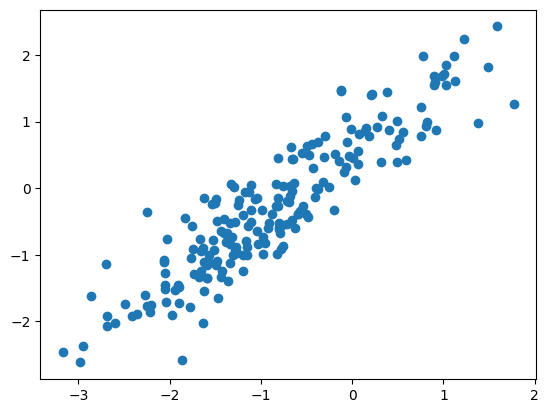

In [12]:
plt.scatter(x=synsig5k, y=synsig7k)
plt.show()
